In [1]:
import pandas as pd
import os 
import glob 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 

# Plot raw filtering results

In [2]:
path_filtered = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/commit_v3_TEST_merged3_372a147_medium_run_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/filter_TCGA-BH-A18V-01A-11R-A12D-07.all/commit_372a147_full_flags_GTEXcore/G_TCGA-BH-A18V-01A-11R-A12D-07.all_ref_SampleLim0.0CohortLim0.0Across1_FiltNormalsGtexcoreCohortlim0.0Across0.tsv/part-00000-c554ddd4-74fd-4040-8c55-fb27edde84cc-c000.csv'

In [3]:
path_cancer = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/commit_v3_TEST_merged3_372a147_medium_run_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/filter_TCGA-BH-A18V-01A-11R-A12D-07.all/commit_372a147_full_flags_a_interm_cancer/interm_cancer_ref_combiExprCohortLim0.0Across1ExceptTCGABHA18V01A11RA12D07all.tsv/'

In [4]:
path_cancers = glob.glob(path_cancer + '*part*')

In [5]:
cancers = [pd.read_csv(path, sep = '\t', header = None) for path in path_cancers ]

cancers = pd.concat(cancers, axis = 0).rename( {0:'kmer', 1:'recurrence'}, axis = 1)

In [6]:
cancers.head()

,kmer,recurrence
0,QVPTSPVPG,47
1,NNNCPDRLP,109
2,PQVPGPPCA,29
3,RHLYQGCQD,1
4,QQIKEEESD,82


In [7]:
filtered = pd.read_csv(path_filtered, sep = '\t')

In [8]:
filtered.head()

,kmer,TCGABHA18V01A11RA12D07all,junctionAnnotated,readFrameAnnotated
0,DINLNSPVD,1.0,1.0,1.0
1,PSHLLKRSR,7050.0,1.0,1.0
2,SALMQVHVT,28.0,1.0,1.0
3,WVWSEKSNL,79.0,1.0,1.0
4,LVCGLFHQQ,145.0,1.0,1.0


In [9]:
df = filtered.merge(cancers, on = 'kmer', how = 'left')

In [10]:
df.head()

,kmer,TCGABHA18V01A11RA12D07all,junctionAnnotated,readFrameAnnotated,recurrence
0,DINLNSPVD,1.0,1.0,1.0,26
1,PSHLLKRSR,7050.0,1.0,1.0,1101
2,SALMQVHVT,28.0,1.0,1.0,1089
3,WVWSEKSNL,79.0,1.0,1.0,1099
4,LVCGLFHQQ,145.0,1.0,1.0,1101


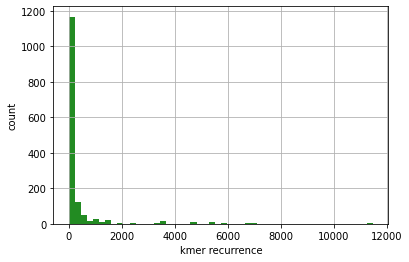

In [11]:
plt.hist(filtered['TCGABHA18V01A11RA12D07all'], bins = 50, color = 'forestgreen')
plt.ylabel('count')
plt.xlabel('kmer recurrence')
plt.grid()

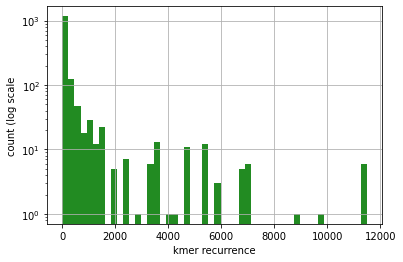

In [12]:
plt.hist(filtered['TCGABHA18V01A11RA12D07all'], bins = 50,  color = 'forestgreen')
plt.yscale('log')
plt.ylabel('count (log scale')
plt.xlabel('kmer recurrence')
plt.grid()

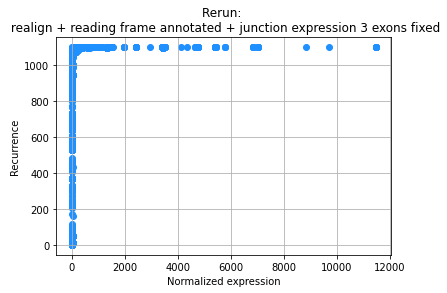

In [13]:
plt.scatter(df['TCGABHA18V01A11RA12D07all'], df['recurrence'], 
           color = 'dodgerblue')
plt.title('Rerun: \n realign + reading frame annotated + junction expression 3 exons fixed')
plt.ylabel('Recurrence')
plt.xlabel('Normalized expression')
plt.grid()

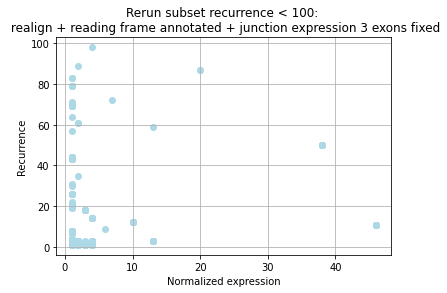

In [14]:
df_plot = df.loc[df['recurrence'] < 100, :]
plt.scatter(df_plot['TCGABHA18V01A11RA12D07all'],
            df_plot['recurrence'], 
            color = 'lightblue')
plt.title('Rerun subset recurrence < 100: \n realign + reading frame annotated + junction expression 3 exons fixed')
plt.ylabel('Recurrence')
plt.xlabel('Normalized expression')
plt.grid()

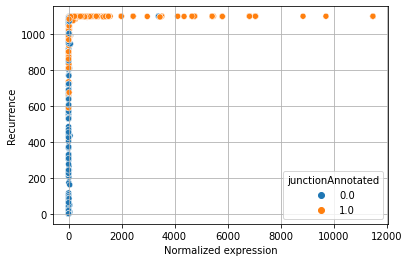

In [15]:

sns.scatterplot(data = df, 
                x = 'TCGABHA18V01A11RA12D07all', 
               y = 'recurrence', 
               hue = 'junctionAnnotated')
plt.ylabel('Recurrence')
plt.xlabel('Normalized expression')
plt.grid()

In [16]:
df_plot.head(20)

,kmer,TCGABHA18V01A11RA12D07all,junctionAnnotated,readFrameAnnotated,recurrence
0,DINLNSPVD,1.0,1.0,1.0,26
11,PGWRAVTGM,1.0,0.0,1.0,3
12,PSSISVHHL,1.0,0.0,1.0,2
17,LVDTITHGL,3.0,0.0,1.0,18
19,SPNSGDFFS,4.0,0.0,1.0,3
21,QSRPALLPS,1.0,0.0,1.0,2
25,QAVMKDVKY,2.0,0.0,1.0,1
32,MEDPFDRAH,2.0,0.0,1.0,3
34,FHLCSVLTR,13.0,0.0,1.0,59
57,NQYREEFLG,6.0,0.0,1.0,9


In [17]:
df_plot.loc[df_plot['kmer'] == 'NRLSVWSPW']

,kmer,TCGABHA18V01A11RA12D07all,junctionAnnotated,readFrameAnnotated,recurrence


# Look at the Junc, Segm and metadata file in GTEX to understand if kmer is present in the background

In [18]:
paths_gtex_extract = '/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/GTEX2019_commit_v3_TEST_merged3_372a147_medium_run_pya.0.17.1_conf2_annot_ref_chrall_cap/cohort_mutNone'

In [19]:
paths_gtex_extract = glob.glob(paths_gtex_extract + '/tmp*/tmp*')

In [103]:
paths_gtex_extract

['/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/GTEX2019_commit_v3_TEST_merged3_372a147_medium_run_pya.0.17.1_conf2_annot_ref_chrall_cap/cohort_mutNone/tmp_out_ref_batch_14182/tmp_RCCPWTPTS_sample_peptides_meta.pq',
 '/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/GTEX2019_commit_v3_TEST_merged3_372a147_medium_run_pya.0.17.1_conf2_annot_ref_chrall_cap/cohort_mutNone/tmp_out_ref_batch_14182/tmp_RCCPWTPTS_SegmExpr.csv',
 '/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/GTEX2019_commit_v3_TEST_merged3_372a147_medium_run_pya.0.17.1_conf2_annot_ref_chrall_cap/cohort_mutNone/tmp_out_ref_batch_14182/tmp_RCCPWTPTS_JuncExpr.csv',
 '/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/GTEX2019_commit_v3_TEST_merged3_372a147_medium_run_pya.0.17.1_conf2_annot_ref_chrall_cap/cohort_mutNone/tmp_out_ref_ba

In [21]:
# GET JUNCTION PATHS 
path_Junc = [path for path in paths_gtex_extract if 'Junc' in path]

In [54]:
# PROPORTION OF EMPTY GTEX GENERATION FILES
is_found = []
not_empty_rf_annot = []
empty_missing_gtex_kmers = []
for path in path_Junc:
    try: # Is found in GTEX
        test = pd.read_csv(path, header = None)
        is_found.append(1)
        not_empty_rf_annot.append([path, test.iloc[:, -1:].values[0][0]])
    except: # Is not found in GTEX
        is_found.append(0)
        empty_missing_gtex_kmers.append(os.path.basename(path).split('_')[1])


Text(0.5, 0, 'GTEX presence, at peptide level')

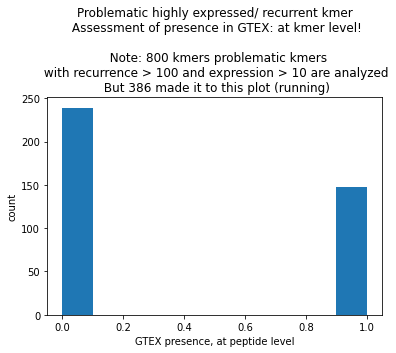

In [46]:
plt.hist(is_found)
len_kmers = len(is_found)
plt.title((f'Problematic highly expressed/ recurrent kmer'
          f'\n Assessment of presence in GTEX: at kmer level!'
          f'\n \n  Note: 800 kmers problematic kmers'
          f'\n with recurrence > 100 and expression > 10 are analyzed'
          f'\n But {len_kmers} made it to this plot (running)'))
plt.ylabel('count')
plt.xlabel('GTEX presence, at peptide level')

Text(0.5, 0, 'Reading frame annotated status')

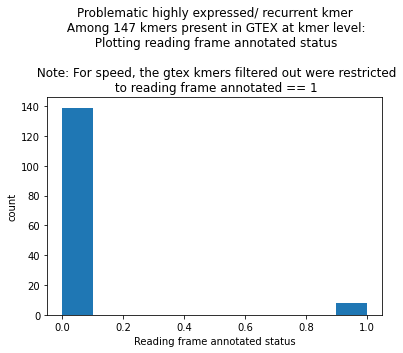

In [51]:
len_present_gtex = len([foo for foo in is_found if foo == 1])
plt.hist([read_frame_annot[1] for read_frame_annot in not_empty_rf_annot ])
plt.title((f'Problematic highly expressed/ recurrent kmer'
          f'\n Among {len_present_gtex} kmers present in GTEX at kmer level:'
          f'\n Plotting reading frame annotated status'
          f'\n \n Note: For speed, the gtex kmers filtered out were restricted'
           f'\n to reading frame annotated == 1' ))
plt.ylabel('count')
plt.xlabel('Reading frame annotated status')

In [ ]:
plt.ylabel('count')

### Test the case where the reading frame is annotated = 1 

In [138]:
case3 = [ instance[0] for instance in not_empty_rf_annot if instance[1] == 1 ]
for path in case3:
    test_case3 = pd.read_csv(path, header = None)

    print(np.sum(test_case3.iloc[:, 1:9756].isna().iloc[0, :]))

    print(test_case3.iloc[:, 1:9756].isna().shape)

    display(test_case3)

9755
(1, 9755)


,0,1,2,3,4,5,6,7,8,9,...,9749,9750,9751,9752,9753,9754,9755,9756,9757,9758
0,LGPLPRQVP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,1.0


9755
(1, 9755)


,0,1,2,3,4,5,6,7,8,9,...,9749,9750,9751,9752,9753,9754,9755,9756,9757,9758
0,GLGPLPRQV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,1.0


9755
(1, 9755)


,0,1,2,3,4,5,6,7,8,9,...,9749,9750,9751,9752,9753,9754,9755,9756,9757,9758
0,NRLSVWSPW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,1.0


# Extract the junction coordinates from the BRCA problematic kmers 

In [57]:
path_kmers_debug_metadata = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/commit_v3_TEST_merged3_372a147_medium_run_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/test_debug'

In [56]:
len(empty_missing_gtex_kmers)

239

In [59]:
kmer = empty_missing_gtex_kmers[0]

In [61]:
os.path.join(path_kmers_debug_metadata, kmer + '_peptides.txt')

'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/commit_v3_TEST_merged3_372a147_medium_run_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/test_debug/LHYLCAVPS_peptides.txt'

In [65]:
path_meta_kmer = os.path.join(path_kmers_debug_metadata, kmer + '_peptides.txt')
print(path_meta_kmer)
meta_kmer = pd.read_csv(path_meta_kmer, 
                       usecols=[2,3])

/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/commit_v3_TEST_merged3_372a147_medium_run_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/test_debug/LHYLCAVPS_peptides.txt


ParserError: Error tokenizing data. C error: EOF inside string starting at row 1